# Project 3: Pendulums and Projectiles.

Andrew Schnurr and Erika Serna

ModSimPy 

Allen Downey is god.

In [63]:
#import in the modsimpy library

%matplotlib notebook

from modsim import *

In [64]:
#introduce units

m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram

In [65]:
#derees and radians

degree = UNITS.degree
radian = UNITS.radian

### Pendulum

This notebook solves the Spider-Man problem from spiderman.ipynb, demonstrating a different development process for physical simulations.

In pendulum_sympy, we derive the equations of motion for a rigid pendulum without drag, yielding:

$ \ddot{x} = \frac{x}{x^{2} + y^{2}} \left(g y - vx^{2} - vy^{2}\right) $

$ \ddot{y} = - \frac{1}{x^{2} + y^{2}} \left(g x^{2} + y \left(vx^{2} + vy^{2}\right)\right) $

We'll use the same conditions we saw in `spiderman.ipynb`

In [103]:
condition = Condition(g = 9.8,
                      m = 75,
                      #area = 1,
                      #rho = 1.2,
                      v_term = 60,
                      duration = 30,
                      length0 = 50,
                      angle = 270,
                      k = 20)

Now here's a version of `make_system` that takes a `Condition` object as a parameter.

`make_system` uses the given value of `v_term` to compute the drag coefficient `C_d`.

In [104]:
def make_system(condition):
    """Makes a System object for the given conditions.
    
    condition: Condition with height, g, m, diameter, 
               rho, v_term, and duration
    
    returns: System with init, g, m, rho, C_d, area, and ts
    """
    unpack(condition)
        
    theta = np.deg2rad(angle)
    x, y = pol2cart(theta, length0)
    P = Vector(x, y)
    V = Vector(0, 0)
    
    init = State(x=P.x, y=P.y, vx=V.x, vy=V.y)
    C_d = 2 * m * g / (rho * area * v_term**2)
    ts = linspace(0, duration, 501)
    
    
    return System(init=init, g=g, m=m, rho=rho,
                  C_d=C_d, area=area, length0=length0,
                  k=k, ts=ts)

In [105]:
#make a system

system = make_system(condition)
system

,value
init,x -9.184850993605149e-15 dimensionless y ...
g,9.8
m,75
rho,1.2
C_d,0.340278
area,1
length0,50
k,20
ts,"[0.0, 0.06, 0.12, 0.18, 0.24, 0.3, 0.36, 0.42,..."


In [106]:
system.init

,value
x,-9.184850993605149e-15 dimensionless
y,-50.0 dimensionless
vx,0 dimensionless
vy,0 dimensionless


In [107]:
# writing the slope from the modsym library

def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with length0, m, k
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)

    ax = x*(g*y - vx**2 - vy**2)/(x**2 + y**2)
    ay = -(g*x**2 + y*(vx**2 + vy**2))/(x**2 + y**2)

    return vx, vy, ax, ay

In [108]:
slope_func(system.init, 0, system)

(<Quantity(0, 'dimensionless')>,
 <Quantity(0, 'dimensionless')>,
 <Quantity(1.800230794746609e-15, 'dimensionless')>,
 <Quantity(-3.3069703207693966e-31, 'dimensionless')>)

In [109]:
time run_odeint(system, slope_func) #how long it takes to stop.

Wall time: 4.03 ms


# Visualization

In [110]:
xs = system.results.x
ys = system.results.y

<IPython.core.display.Javascript object>


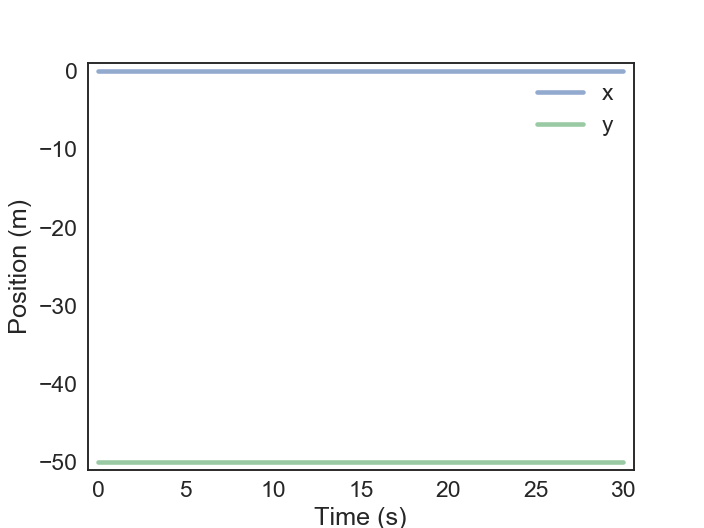

In [111]:
newfig()
plot(xs, label='x')
plot(ys, label='y')

decorate(xlabel='Time (s)',
         ylabel='Position (m)')

In [37]:
#control WEIGHT and SIZE of items

# condition = Condition(x= 2 * m, #mass of projectile
#                      y= 1 * m, 
 #                     mass_projectile= 2 * kg,
  #                    mass_pendulum= 1 * kg,
   #                   velocity_projectile= 10 * m * s ** -1,
    #                  gravitational_acceleration= 9.8 * m * s **-2,
     #                angle= 0 * degree,
      #               duration= 1 * s)

In [21]:
def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity_projectile)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
   
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, gravitational_accelreation=gravitational_acceleration, mass_projectile=mass_projectile,
                  mass_pendulum = mass_pendulum, 
                   ts=ts, velocity_projectile=velocity_projectile)

In [22]:
system = make_system(condition)
system

,value
init,x 2 meter y 1 ...
gravitational_accelreation,9.8 meter / second ** 2
mass_projectile,2 kilogram
mass_pendulum,1 kilogram
ts,"[0.0 second, 0.01 second, 0.02 second, 0.03 se..."
velocity_projectile,10.0 meter / second


In [14]:
def slope_func(state,t,system):
    x, y, vx, vy = state
    unpack(system)
    
    velocity_projectile = Vector(vx, vy)
    
    height = (velocity_projectile ** 2) / (2 ** gravitational_acceleration)
    
    return vx, vy, height

In [15]:
slope_func(system.init, 0, system)

DimensionalityError: Cannot convert from 'meter / second ** 2' to 'dimensionless'

In [16]:
def calculate_max_height(system, max_height):
    unpack(system)
    max_height= (((mass_projectile * velocity_projectile)/mass_pendulum) ** 2) / (2 * gravitational_acceleration)
    return max_height
    

In [61]:
calculate_max_height(system, calculate_max_height)

<Quantity(5.1020408163265305, 'meter')>